This notebook performs all intermediate steps after feature extracting.

This includes: speaker distribution, weight application for imbalanced speakers, and train/test split.

At the end, each variant of train/test data is saved according to parameter that was changed.

The y_trainHot and y_testHot will not be saved more than once because they do not change.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import keras as k

Using TensorFlow backend.


In [3]:
#BASELINE MODEL
#load the numpy arrays
x=np.load('baseline_other32_x.npy')
y=np.load('baseline_other32_y.npy')

In [4]:
#add fourth dimension for CNN Conv3D permission
x=x[:, np.newaxis, :]

### these steps are only to view the distribution of speakers via seaborn

In [5]:
#convert x to list for dataframe-merge permission
temp=list(x)

In [6]:
#label encoding
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

le.fit(y)
y=le.transform(y)

In [7]:
#creat dataframe of the x and y array (to see distribution)
df=pd.DataFrame()
df['mels']=temp
df['labs']=y

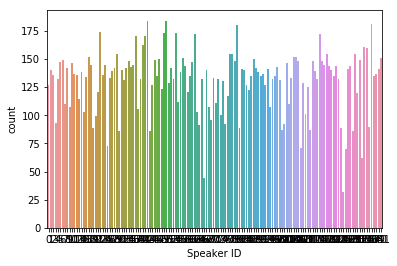

In [8]:
#create histogram of speaker distribution
lab=df['labs']
dist=lab.value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(lab)
plt.xlabel('Speaker ID')
plt.show()

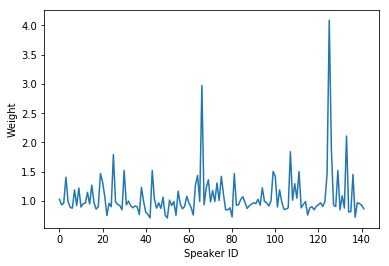

In [9]:
#balance the speakers 
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight('balanced', np.unique(y), y)
plt.plot(class_weight)
plt.xlabel('Speaker ID')
plt.ylabel('Weight')
plt.show()

In [10]:
#number of speakers
len(np.unique(y))

142

In [10]:
#save the weights for balancing the speakers
np.save('weights_other.npy', class_weight)

### back to the big picture

In [11]:
#create training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

#check the dimensions
print(x_train.shape)
print(x_test.shape)

(14864, 1, 32, 586)
(3716, 1, 32, 586)


In [12]:
#create evaluation set from 20% of training data before it's put in the model
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=.2, random_state=3)

#check the dimensions
print(x_train.shape)
print(x_val.shape)

(11891, 1, 32, 586)
(2973, 1, 32, 586)


In [13]:
#dummy code labels using one hot encoding
from keras.utils.np_utils import to_categorical

y_trainHot=to_categorical(y_train,num_classes=142)
y_testHot=to_categorical(y_test,num_classes=142)
y_valHot=to_categorical(y_val,num_classes=142)

In [14]:
#check labels
print(y_trainHot.shape)
print(y_testHot.shape)
print(y_valHot.shape)

(11891, 142)
(3716, 142)
(2973, 142)


### BASELINE MODEL

#save the train, test, and validation data for clean data - 4 mfccs
np.save('base4_x_train.npy', x_train)
np.save('base4_x_test.npy', x_test)
np.save('base4_x_val.npy', x_val)
np.save('base4_y_train.npy', y_trainHot)
np.save('base4_y_test.npy', y_testHot)
np.save('base4_y_val.npy', y_valHot)

#save the train, test, and validation data for clean data - 8 mfccs
np.save('base8_x_train.npy', x_train)
np.save('base8_x_test.npy', x_test)
np.save('base8_x_val.npy', x_val)
np.save('base8_y_train.npy', y_trainHot)
np.save('base8_y_test.npy', y_testHot)
np.save('base8_y_val.npy', y_valHot)

#save the train, test, and validation data for clean data - 32 mfccs
np.save('base_x_train.npy', x_train)
np.save('base_x_test.npy', x_test)
np.save('base_x_val.npy', x_val)
np.save('base_y_train.npy', y_trainHot)
np.save('base_y_test.npy', y_testHot)
np.save('base_y_val.npy', y_valHot)

#save the train, test, and validation data for other data - 4 mfccs
np.save('other_base_x_train.npy', x_train)
np.save('other_base_x_test.npy', x_test)
np.save('other_base_x_val.npy', x_val)
np.save('other_base_y_train.npy', y_trainHot)
np.save('other_base_y_test.npy', y_testHot)
np.save('other_base_y_val.npy', y_valHot)

#save the train, test, and validation data for other data - 8 mfccs
np.save('other8_base_x_train.npy', x_train)
np.save('other8_base_x_test.npy', x_test)
np.save('other8_base_x_val.npy', x_val)
np.save('other8_base_y_train.npy', y_trainHot)
np.save('other8_base_y_test.npy', y_testHot)
np.save('other8_base_y_val.npy', y_valHot)

#save the train, test, and validation data for other data - 32 mfccs
np.save('other32_base_x_train.npy', x_train)
np.save('other32_base_x_test.npy', x_test)
np.save('other32_base_x_val.npy', x_val)
np.save('other32_base_y_train.npy', y_trainHot)
np.save('other32_base_y_test.npy', y_testHot)
np.save('other32_base_y_val.npy', y_valHot)